# Permutation Test Example

## Description
The permutation test is a non-parametric statistical significance test that determines whether the observed difference between two samples is statistically significant. Unlike parametric tests such as the t-test, the permutation test makes no assumptions about the distribution of the data, making it particularly useful when dealing with non-normal distributions or small sample sizes.

### Mathematical Definition
The permutation test works by calculating all possible (or a large random sample of) rearrangements of the data points between the two groups. The null hypothesis is that the two groups come from the same distribution, which means any rearrangement of the data between the two groups is equally likely.

Let's say we have two samples $X = \{x_1, x_2, ..., x_n\}$ and $Y = \{y_1, y_2, ..., y_m\}$. Our test statistic $T$ could be the difference between sample means: $T = \bar{X} - \bar{Y}$.

1. Calculate the observed test statistic $T_{obs}$.
2. Combine all data into one set $Z = X \cup Y$.
3. Randomly shuffle $Z$ and split it into two new sets $X'$ and $Y'$ of sizes $n$ and $m$ respectively.
4. Calculate the test statistic $T'$ for this permutation.
5. Repeat steps 3-4 many times (ideally all possible permutations, but typically a large number of random permutations).
6. Calculate the p-value as the proportion of permutations where $|T'| \geq |T_{obs}|$.

## Visual Illustration

![Permutation Test Visualization](../Figures/AndyGebhardt/permutation_visualization.png)
*Figure: Illustration of the permutation test process. Starting with two separate datasets (top), we calculate the observed difference. Then we pool all data (middle) and repeatedly shuffle and re-split the data (bottom), calculating the test statistic for each permutation. The p-value is the proportion of permutations with a test statistic as extreme as or more extreme than the observed value.*

## When to Use a Permutation Test

The permutation test is particularly useful in the following situations:

1. **Small sample sizes**: When the sample size is too small for parametric assumptions to be reliably met.

2. **Non-normal distributions**: When the data doesn't follow a normal distribution, making parametric tests like the t-test inappropriate.

3. **Complex statistics**: When using a test statistic that doesn't have a known sampling distribution.

4. **Biological data analysis**: In genomics and bioinformatics, where data often doesn't fit standard distributions and sample sizes may be limited.

5. **Ecological studies**: When comparing biodiversity metrics or species abundance between different sites or treatments.

6. **Clinical trials with unusual endpoints**: When traditional parametric methods may not be applicable due to the nature of the data.

The permutation test provides a robust alternative to parametric tests, allowing researchers to make valid statistical inferences without relying on distributional assumptions.

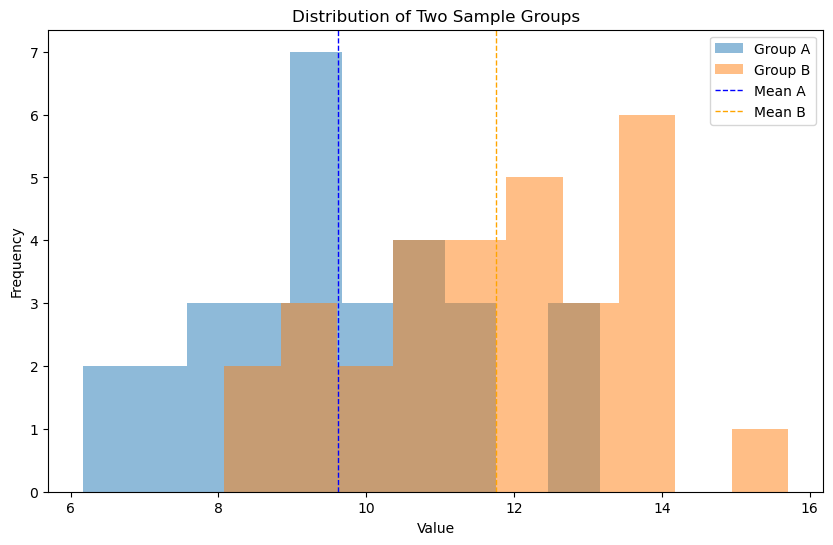

Observed difference in means: -2.1340
Permutation test p-value: 0.0000
Conclusion: The difference between the groups is statistically significant (p < 0.05).

For comparison - t-test p-value: 0.0000

=== Example with Skewed Distributions ===


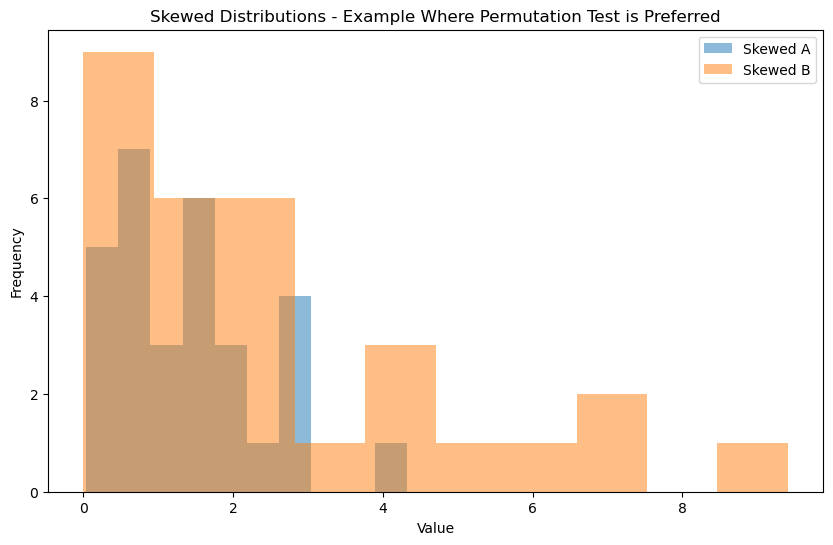

Observed difference in means (skewed data): -1.0884
Permutation test p-value: 0.0285
t-test p-value: 0.0290

Note: With non-normal data, the permutation test may provide more reliable results than the t-test.


In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Define permutation test function
def permutation_test(a, b, n_permutations=10000, statistic=None):
    '''
    Perform a permutation test to determine if two samples come from the same distribution.
    
    Parameters:
    a : array_like
        First sample.
    b : array_like
        Second sample.
    n_permutations : int, optional
        Number of permutations to perform. Default is 10000.
    statistic : function, optional
        Function that returns the test statistic. Default is the difference in means.
        
    Returns:
    p_value : float
        The estimated p-value for the null hypothesis that the two samples come from the same distribution.
    observed_stat : float
        The observed test statistic.
        
    Example:
    >>> a = [10, 11, 12, 13, 14]
    >>> b = [7, 8, 9, 10, 11]
    >>> p_value, observed_stat = permutation_test(a, b)
    >>> print(f"P-value: {p_value}")
    P-value: 0.0384
    >>> print(f"Observed statistic: {observed_stat}")
    Observed statistic: 3.0
    
    Notes:
    The permutation test is a non-parametric statistical test that estimates the probability of obtaining
    the observed test statistic (or a more extreme value) under the null hypothesis that the two samples
    come from the same distribution. The test works by randomly permuting the combined data many times
    and calculating the test statistic for each permutation.
    
    The test makes no assumptions about the underlying distributions of the data, making it useful
    when the assumptions of parametric tests (like the t-test) are not met.
    '''
    import numpy as np
    
    # Convert inputs to numpy arrays
    a = np.array(a)
    b = np.array(b)
    
    # Default statistic is the difference in means
    if statistic is None:
        statistic = lambda x, y: np.mean(x) - np.mean(y)
    
    # Calculate the observed test statistic
    observed_stat = statistic(a, b)
    
    # Combine the data
    combined = np.concatenate((a, b))
    n_a = len(a)
    n_b = len(b)
    n = n_a + n_b
    
    # Count the number of permutations where the statistic is as extreme as observed
    count = 0
    for _ in range(n_permutations):
        # Randomly permute the combined data
        np.random.shuffle(combined)
        
        # Split the permuted data into two groups of the original sizes
        perm_a = combined[:n_a]
        perm_b = combined[n_a:]
        
        # Calculate the permuted test statistic
        perm_stat = statistic(perm_a, perm_b)
        
        # Count if the permuted statistic is as extreme as the observed
        if np.abs(perm_stat) >= np.abs(observed_stat):
            count += 1
    
    # Calculate the p-value
    p_value = count / n_permutations
    
    return p_value, observed_stat
# Set random seed for reproducibility
np.random.seed(42)

# Create two simulated datasets with different distributions
# Group A: Normal distribution with mean=10, std=2
group_a = np.random.normal(loc=10, scale=2, size=30)

# Group B: Normal distribution with mean=12, std=2
group_b = np.random.normal(loc=12, scale=2, size=30)

# Visualize the data
plt.figure(figsize=(10, 6))
plt.hist(group_a, alpha=0.5, label='Group A')
plt.hist(group_b, alpha=0.5, label='Group B')
plt.axvline(np.mean(group_a), color='blue', linestyle='dashed', linewidth=1, label='Mean A')
plt.axvline(np.mean(group_b), color='orange', linestyle='dashed', linewidth=1, label='Mean B')
plt.legend()
plt.title('Distribution of Two Sample Groups')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Perform permutation test
p_value, observed_stat = permutation_test(group_a, group_b, n_permutations=10000)

print(f"Observed difference in means: {observed_stat:.4f}")
print(f"Permutation test p-value: {p_value:.4f}")

# Interpret the result
if p_value < 0.05:
    print("Conclusion: The difference between the groups is statistically significant (p < 0.05).")
else:
    print("Conclusion: The difference between the groups is not statistically significant (p ≥ 0.05).")

# Perform a traditional t-test for comparison
from scipy import stats
t_stat, t_p_value = stats.ttest_ind(group_a, group_b)
print(f"\nFor comparison - t-test p-value: {t_p_value:.4f}")

# Additional example with non-normal data
print("\n=== Example with Skewed Distributions ===")
# Create skewed data (exponential distribution)
skewed_a = np.random.exponential(scale=2.0, size=30)
skewed_b = np.random.exponential(scale=2.5, size=30)

# Visualize skewed data
plt.figure(figsize=(10, 6))
plt.hist(skewed_a, alpha=0.5, label='Skewed A')
plt.hist(skewed_b, alpha=0.5, label='Skewed B')
plt.legend()
plt.title('Skewed Distributions - Example Where Permutation Test is Preferred')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Perform both tests on skewed data
p_value_skewed, observed_stat_skewed = permutation_test(skewed_a, skewed_b, n_permutations=10000)
t_stat_skewed, t_p_value_skewed = stats.ttest_ind(skewed_a, skewed_b)

print(f"Observed difference in means (skewed data): {observed_stat_skewed:.4f}")
print(f"Permutation test p-value: {p_value_skewed:.4f}")
print(f"t-test p-value: {t_p_value_skewed:.4f}")
print("\nNote: With non-normal data, the permutation test may provide more reliable results than the t-test.")